In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [117]:
glm_df = pd.read_excel("C:/Users/tjhaveri/OneDrive - Tesla/TJ Files/Historical Data/GLM_df.xlsx", "Sheet3")

In [118]:
glm_df

,CPN,Case Area,Capacitance,Voltage,Allocation,∆Q1'22,∆Q2'22,∆Q3'22,∆Q4'22,∆Q1'21,...,∆Q3'21,∆Q4'21,∆Q1'20,∆Q2'20,∆Q3'20,∆Q4'20,∆2022,∆2021,∆2020,Price($)
0,2000058,2.580640,0.00047,100.0,1.0,0.0000,0.0,0.0,0.0,0.0047,...,0.0000,0.0,0.0024,0.0004,-0.0028,0.000,0.000000,0.003400,0.00130,0.0047
1,2000058,2.580640,0.00047,100.0,0.0,0.0003,0.0,0.0,0.0,0.0060,...,0.0000,0.0,0.0037,0.0004,-0.0041,0.000,0.000300,0.004050,0.00195,0.0000
2,2000317,1.161288,0.10000,50.0,0.0,0.0000,0.0,0.0,0.0,-0.0410,...,-0.0001,0.0,0.0000,0.0000,0.0000,0.041,0.000800,-0.007750,-0.01025,0.0000
3,2000317,1.161288,0.10000,50.0,1.0,0.0001,0.0,0.0,0.0,0.0003,...,0.0000,0.0,0.0017,0.0000,0.0000,0.000,0.000100,0.000300,-0.01880,0.0000
4,2000317,1.161288,0.10000,50.0,0.0,0.0000,0.0,0.0,0.0,0.0000,...,-0.0001,0.0,0.0000,0.0004,-0.0004,0.000,-0.000025,-0.000075,-0.02040,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1815918-00-A,1.161288,0.22000,100.0,1.0,-0.0020,0.0,0.0,0.0,0.0030,...,-0.0010,0.0,-0.0400,0.0004,-0.0004,0.000,-0.002500,0.002400,0.00010,0.0000
1508,1817143-00-A,2.580640,4.70000,35.0,1.0,-0.0020,0.0,0.0,0.0,0.0030,...,-0.0010,0.0,-0.0400,0.0004,-0.0004,0.000,-0.002500,0.002400,0.00010,0.0000
1509,1862945-00-A,7.741920,2.20000,100.0,0.0,-0.0020,0.0,0.0,0.0,0.0030,...,-0.0010,0.0,-0.0400,0.0004,-0.0004,0.000,-0.002500,0.002400,0.00010,0.0000
1510,1862945-00-A,7.741920,2.20000,100.0,0.0,-0.0020,0.0,0.0,0.0,0.0030,...,-0.0010,0.0,-0.0400,0.0004,-0.0004,0.000,-0.002500,0.002400,0.00010,0.0000


In [119]:
glm_df.head()
glm_df.describe()

,Case Area,Capacitance,Voltage,Allocation,∆Q1'22,∆Q2'22,∆Q3'22,∆Q4'22,∆Q1'21,∆Q2'21,∆Q3'21,∆Q4'21,∆Q1'20,∆Q2'20,∆Q3'20,∆Q4'20,∆2022,∆2021,∆2020,Price($)
count,1512.000000,1.512000e+03,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1.512000e+03,1512.000000,1512.000000,1512.000000
mean,2.164089,2.514065e+00,70.007804,0.464749,0.002440,-0.008429,-0.012477,0.001397,0.039238,0.000074,-0.000470,0.000013,-0.272362,0.000298,-0.038296,0.001330,3.318860e-03,0.020986,-0.079943,0.020305
std,4.453945,7.065476e+00,157.872222,0.446036,0.389838,0.388507,0.690622,0.014157,0.887169,0.002017,0.004032,0.000441,1.061601,0.006295,0.887000,0.008772,2.004311e-01,0.443711,0.502155,0.049810
min,0.129032,1.000000e-07,2.500000,0.000000,-0.552000,-15.000000,-26.833140,0.000000,-0.171500,-0.017800,-0.095000,0.000000,-1.461480,-0.066120,-33.000100,-0.010000,-2.525000e-01,-0.129750,-1.461480,0.000000
25%,0.516128,2.575000e-04,25.000000,0.000000,-0.002868,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001000,0.000000,-0.451500,0.000000,-0.002270,0.000000,-3.025000e-03,0.000000,-0.113100,0.000000
50%,1.161288,1.500000e-02,50.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000560,0.000100,0.003500
75%,2.580640,1.000000e+00,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.005500,0.000000,0.000000,0.000000,0.005700,0.000400,0.000000,0.000000,2.602085e-18,0.004450,0.002700,0.015388
max,64.000000,1.000000e+02,2000.000000,1.000000,14.983000,0.550000,0.500000,0.313500,33.003000,0.069900,0.071900,0.016900,32.999700,0.176000,0.000000,0.150000,6.735120e+00,16.502550,16.499950,0.783700


In [120]:
for col in glm_df.columns:
    print(col)

CPN
Case Area
Capacitance
Voltage
Allocation
∆Q1'22
∆Q2'22
∆Q3'22
∆Q4'22
∆Q1'21
∆Q2'21
∆Q3'21
∆Q4'21
∆Q1'20
∆Q2'20
∆Q3'20
∆Q4'20
∆2022
∆2021
∆2020
Price($)


In [121]:
#### BoxPlots
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

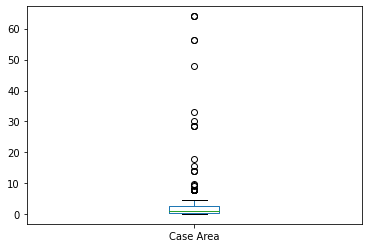

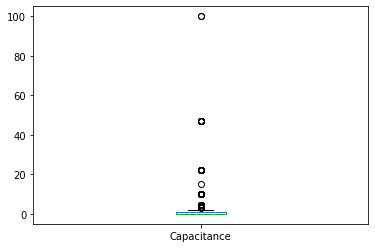

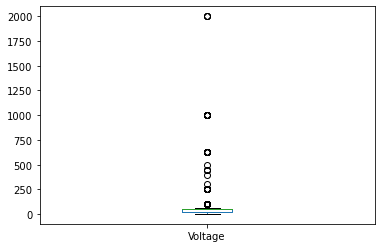

KeyError: "None of [Index(['Price'], dtype='object')] are in the [columns]"

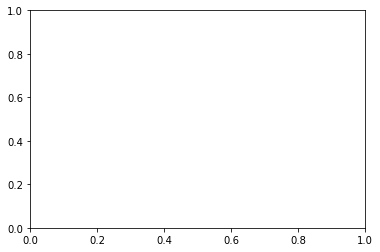

In [122]:
plot_boxplot(glm_df, "Case Area")
plot_boxplot(glm_df, "Capacitance")
plot_boxplot(glm_df, "Voltage")
plot_boxplot(glm_df, "Price")

In [123]:
#### Removing the outliers

In [124]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [127]:
index_list = []
for feature in ['Case Area','Capacitance','Voltage',"∆Q1'22","∆Q2'22","∆Q3'22","∆Q4'22","∆Q1'21","∆Q2'21","∆Q3'21","∆Q4'21","∆Q1'20","∆Q2'20","∆Q3'20","∆Q4'20","Price($)"]:
    index_list.extend(outliers(glm_df, feature))

In [128]:
index_list

[19,
 20,
 103,
 129,
 130,
 131,
 153,
 156,
 157,
 164,
 167,
 240,
 241,
 261,
 272,
 273,
 277,
 291,
 296,
 297,
 315,
 319,
 332,
 333,
 334,
 335,
 336,
 337,
 403,
 404,
 436,
 437,
 438,
 439,
 486,
 497,
 498,
 499,
 507,
 516,
 517,
 518,
 537,
 553,
 554,
 568,
 569,
 572,
 573,
 575,
 584,
 585,
 611,
 618,
 706,
 707,
 708,
 788,
 852,
 860,
 933,
 934,
 935,
 952,
 953,
 1049,
 1176,
 1178,
 1182,
 1184,
 1188,
 1202,
 1203,
 1221,
 1224,
 1232,
 1251,
 1252,
 1254,
 1255,
 1265,
 1333,
 1340,
 1341,
 1367,
 1375,
 1376,
 1377,
 1378,
 1379,
 1382,
 1384,
 1395,
 1453,
 1454,
 1462,
 1463,
 1509,
 1510,
 1511,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 19,
 59,
 60,
 61,
 62,
 63,
 103,
 129,
 130,
 131,
 156,
 157,
 165,
 166,
 231,
 232,
 233,
 234,
 240,
 241,
 259,
 277,
 278,
 279,
 283,
 284,
 285,
 291,
 294,
 296,
 297,
 299,
 300,
 301,
 314,
 315,
 319,
 338,
 339,
 366,
 367,
 372,
 373,
 374,
 375,
 376,
 379,
 380,
 388,
 389,
 391,
 395,
 403,
 404,
 414,
 415

In [129]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [130]:
df_cleaned = remove(glm_df,index_list)

In [131]:
df_cleaned.shape

(194, 21)

In [132]:
glm_df.shape

(1512, 21)

In [133]:
print(type(df_cleaned))

<class 'pandas.core.frame.DataFrame'>


In [134]:
df = pd.DataFrame (df_cleaned)

## save to xlsx file

filepath = 'C:/Users/tjhaveri/OneDrive - Tesla/TJ Files/Historical Data/Cleaned DF.xlsx'

df.to_excel(filepath, index=False)

In [135]:
### Normalizing the data
### Method 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned.iloc[:,3:]=scaler.fit_transform(df_cleaned.iloc[:,3:])
print(df_cleaned)

               CPN  Case Area  Capacitance   Voltage  Allocation    ∆Q1'22  \
3          2000317   1.161288     0.100000  0.720195    1.391427  0.820236   
43         2005179   1.161288     0.100000 -1.649794   -0.906886  0.722607   
48         2005184   2.580640     1.000000 -1.022444   -0.906886 -1.229977   
77         2005410   1.161288     0.470000 -1.022444    1.391427  0.722607   
92         2005864   1.161288     0.100000  0.720195   -0.906886  0.722607   
...            ...        ...          ...       ...         ...       ...   
1416       2001046   1.161288     0.000220  0.720195   -0.906886  0.722607   
1432       2005071   1.161288     0.000047  0.720195    1.391427  0.722607   
1471       2000004   0.129032     0.000022  0.720195    1.391427 -1.229977   
1472  1008036-00-A   0.129032     0.003300 -1.649794   -0.906886 -1.229977   
1486  1549314-00-A   0.129032     0.000008  0.720195    1.391427 -1.229977   

      ∆Q2'22  ∆Q3'22  ∆Q4'22    ∆Q1'21  ...    ∆Q3'21  ∆Q4'21  

In [139]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm

In [141]:
x = df_cleaned[["Case Area","Capacitance","Voltage","∆Q1'22","∆Q2'22","∆Q3'22","∆Q4'22","∆Q1'21","∆Q2'21","∆Q3'21","∆Q4'21","∆Q1'20","∆Q2'20","∆Q3'20","∆Q4'20"]]
y = df_cleaned["Price($)"]

In [142]:
model = sm.GLM(y,x, family = sm.families.Gaussian())
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Price($)   No. Observations:                  194
Model:                            GLM   Df Residuals:                      185
Model Family:                Gaussian   Df Model:                            8
Link Function:               identity   Scale:                         0.84372
Method:                          IRLS   Log-Likelihood:                -254.18
Date:                Wed, 28 Dec 2022   Deviance:                       156.09
Time:                        14:32:28   Pearson chi2:                     156.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2076
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Case Area       0.2238      0.070      3.198      

In [143]:
output = res.predict()

In [144]:
output

array([ 0.34606986,  0.24813328,  0.68337436,  0.41302616,  0.71775687,
        0.77420996,  0.24066123,  0.24066123,  0.42032081,  0.05801673,
        0.24056449,  0.24061397,  0.24061397,  0.79940756,  0.72080292,
        0.45161166, -0.0974256 , -0.0974256 , -0.18790661, -0.18790661,
        0.45158261, -0.03184898, -0.03184898, -0.15582096, -0.15582096,
       -0.26080524, -0.26080524, -0.15581709, -0.15581709, -0.18786788,
       -0.18786788, -0.18786788,  0.0293667 ,  0.0293667 , -0.1997441 ,
       -0.1997441 , -0.18793669, -0.18793669, -0.0639647 , -0.22698009,
       -0.15579192, -0.15579192, -0.03184155, -0.20628576, -0.18761615,
       -0.20696349,  0.03995668,  0.03995668,  0.2573444 ,  1.20719064,
        0.83550581,  1.81821819,  0.53247536,  0.03997114,  0.25734732,
        0.25734732,  0.66896233, -0.59978537,  0.64832127,  0.2400688 ,
        0.9759216 ,  0.70687919,  0.3844048 ,  0.24036263,  0.24007961,
       -0.09971205, -0.09971205,  0.24112055,  0.02290747,  0.71

In [145]:
df = pd.DataFrame (output)

## save to xlsx file

filepath = 'C:/Users/tjhaveri/OneDrive - Tesla/TJ Files/Historical Data/predicted_price.xlsx'

df.to_excel(filepath, index=False)

In [146]:
#### Multiple Linear Regression

In [419]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [420]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [421]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.008873890075273196
Coefficients:


[('Case Area', 0.574462845479008),
 ('Capacitance', 0.06605628124363655),
 ('Voltage', -0.007647629282838419)]

In [422]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 1.32684793e+00  1.23938210e-01 -2.64385415e-01 -2.96633346e-01
  4.17351820e-01 -5.36143330e-01 -2.96644489e-01 -5.27462959e-01
  1.23248941e-01 -2.71840035e-01  1.35626181e-01  1.04972803e+00
 -5.36128472e-01  1.23257237e-01 -5.48579334e-01  1.32684793e+00
 -2.96645393e-01 -2.96632108e-01 -2.53876323e-03 -5.27462959e-01
  1.44970711e-01  1.33629045e+00 -2.96422864e-01  1.23257237e-01
  1.23245437e-01  2.63955254e-01 -5.14480959e-01  1.23826778e-01
  4.17351820e-01  1.23272094e-01  1.35626181e-01 -5.36128472e-01
 -2.96640899e-01 -2.96561535e-01 -2.96643499e-01 -4.99623368e-01
  1.23246093e-01 -5.48579062e-01 -5.27462959e-01 -2.96237144e-01
 -5.16319765e-01 -5.31410550e-01  1.31664157e-01 -2.96644489e-01
 -5.48578592e-01 -2.96644886e-01  1.35626181e-01  1.25968747e-01
  1.35626181e-01  1.23246093e-01 -5.48575991e-01  1.23467719e-01
 -2.96642013e-01 -2.90826504e-01  1.07180983e+00  1.23257237e-01
  2.47058115e-01 -1.52953481e-01 -2.96645232e-01  1.23259713e-01


In [423]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
340,2.050104,1.326848
501,-0.346308,0.123938
798,-0.465703,-0.264385
646,-0.410270,-0.296633
843,0.063043,0.417352


In [424]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 32.60
Mean Absolute Error: 0.34850519732797536
Mean Square Error: 0.3475581905010163
Root Mean Square Error: 0.5895406606002814
